# Introduction to Deep Learning with PyTorch

In this notebook, you'll get introduced to [PyTorch](http://pytorch.org/), a framework for building and training neural networks. PyTorch in a lot of ways behaves like the arrays you love from Numpy. These Numpy arrays, after all, are just tensors. PyTorch takes these tensors and makes it simple to move them to GPUs for the faster processing needed when training neural networks. It also provides a module that automatically calculates gradients (for backpropagation!) and another module specifically for building neural networks. All together, PyTorch ends up being more coherent with Python and the Numpy/Scipy stack compared to TensorFlow and other frameworks.



## Neural Networks

Deep Learning is based on artificial neural networks which have been around in some form since the late 1950s. The networks are built from individual parts approximating neurons, typically called units or simply "neurons." Each unit has some number of weighted inputs. These weighted inputs are summed together (a linear combination) then passed through an activation function to get the unit's output.

<img src="https://drive.google.com/uc?id=1ckyuKqRWay-M16NDASAOPlpR9KOn74-i" width=400px>

Mathematically this looks like: 

$$
\begin{align}
y &= f(w_1 x_1 + w_2 x_2 + b) \\
y &= f\left(\sum_i w_i x_i \right)
\end{align}
$$

With vectors this is the dot/inner product of two vectors:

$$
h = \begin{bmatrix}
x_1 \, x_2 \cdots  x_n
\end{bmatrix}
\cdot 
\begin{bmatrix}
           w_1 \\
           w_2 \\
           \vdots \\
           w_n
\end{bmatrix}
$$

### Stack them up!

We can assemble these unit neurons into layers and stacks, into a network of neurons. The output of one layer of neurons becomes the input for the next layer. With multiple input units and output units, we now need to express the weights as a matrix.

<img src='https://drive.google.com/uc?id=1lwm1BVgIZGq4oeWTy-jTnKauOJ0Qoxrh' width=450px>

We can express this mathematically with matrices again and use matrix multiplication to get linear combinations for each unit in one operation. For example, the hidden layer ($h_1$ and $h_2$ here) can be calculated 

$$
\vec{h} = [h_1 \, h_2] = 
\begin{bmatrix}
x_1 \, x_2 \cdots \, x_n
\end{bmatrix}
\cdot 
\begin{bmatrix}
           w_{11} & w_{12} \\
           w_{21} &w_{22} \\
           \vdots &\vdots \\
           w_{n1} &w_{n2}
\end{bmatrix}
$$

The output for this small network is found by treating the hidden layer as inputs for the output unit. The network output is expressed simply

$$
y =  f_2 \! \left(\, f_1 \! \left(\vec{x} \, \mathbf{W_1}\right) \mathbf{W_2} \right)
$$

## Tensors

It turns out neural network computations are just a bunch of linear algebra operations on *tensors*, a generalization of matrices. A vector is a 1-dimensional tensor, a matrix is a 2-dimensional tensor, an array with three indices is a 3-dimensional tensor (RGB color images for example). The fundamental data structure for neural networks are tensors and PyTorch (as well as pretty much every other deep learning framework) is built around tensors.

<img src="https://drive.google.com/uc?id=16lkUA7r4nVs8fXfv2AJ8zUY577-o4oWZ" width=600px>

With the basics covered, it's time to explore how we can use PyTorch to build a simple neural network.

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

First, let's see how we work with PyTorch tensors. These are the fundamental data structures of neural networks and PyTorch, so it's imporatant to understand how these work.

In [4]:
x = torch.rand(3, 2)
x.size()

torch.Size([3, 2])

In [5]:
y = torch.ones(x.size())
y

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [6]:
z = x + y
z

tensor([[1.5863, 1.4936],
        [1.3026, 1.4765],
        [1.2783, 1.7209]])

In general PyTorch tensors behave similar to Numpy arrays. They are zero indexed and support slicing.

In [7]:
z[0]

tensor([1.5863, 1.4936])

In [8]:
z[:, 1:]

tensor([[1.4936],
        [1.4765],
        [1.7209]])

Tensors typically have two forms of methods, one method that returns another tensor and another method that performs the operation in place. That is, the values in memory for that tensor are changed without creating a new tensor. In-place functions are always followed by an underscore, for example `z.add()` and `z.add_()`.

In [9]:
# Return a new tensor z + 1
z.add(1)

tensor([[2.5863, 2.4936],
        [2.3026, 2.4765],
        [2.2783, 2.7209]])

In [10]:
# z tensor is unchanged
z

tensor([[1.5863, 1.4936],
        [1.3026, 1.4765],
        [1.2783, 1.7209]])

In [11]:
# Add 1 and update z tensor in-place
z.add_(1)

tensor([[2.5863, 2.4936],
        [2.3026, 2.4765],
        [2.2783, 2.7209]])

In [12]:
# z has been updated
z

tensor([[2.5863, 2.4936],
        [2.3026, 2.4765],
        [2.2783, 2.7209]])

### Reshaping

Reshaping tensors is a really common operation. First to get the size and shape of a tensor use `.size()`. Then, to reshape a tensor, use `.resize_()`. Notice the underscore, reshaping is an in-place operation.

In [13]:
z.size()

torch.Size([3, 2])

In [14]:
z.resize_(2, 3)

tensor([[2.5863, 2.4936, 2.3026],
        [2.4765, 2.2783, 2.7209]])

In [15]:
z

tensor([[2.5863, 2.4936, 2.3026],
        [2.4765, 2.2783, 2.7209]])

## Numpy to Torch and back

Converting between Numpy arrays and Torch tensors is super simple and useful. To create a tensor from a Numpy array, use `torch.from_numpy()`. To convert a tensor to a Numpy array, use the `.numpy()` method.

In [16]:
a = np.random.rand(4,3)
a

array([[0.45724468, 0.97296247, 0.01140351],
       [0.38335541, 0.48895615, 0.96179947],
       [0.94078131, 0.91790203, 0.90661787],
       [0.51046818, 0.92989711, 0.36231066]])

In [17]:
b = torch.from_numpy(a)
b

tensor([[0.4572, 0.9730, 0.0114],
        [0.3834, 0.4890, 0.9618],
        [0.9408, 0.9179, 0.9066],
        [0.5105, 0.9299, 0.3623]], dtype=torch.float64)

In [18]:
b.numpy()

array([[0.45724468, 0.97296247, 0.01140351],
       [0.38335541, 0.48895615, 0.96179947],
       [0.94078131, 0.91790203, 0.90661787],
       [0.51046818, 0.92989711, 0.36231066]])

The memory is shared between the Numpy array and Torch tensor, so if you change the values in-place of one object, the other will change as well.

In [19]:
# Multiply PyTorch Tensor by 2, in place
b.mul_(2)

tensor([[0.9145, 1.9459, 0.0228],
        [0.7667, 0.9779, 1.9236],
        [1.8816, 1.8358, 1.8132],
        [1.0209, 1.8598, 0.7246]], dtype=torch.float64)

In [20]:
# Numpy array matches new values from Tensor
a

array([[0.91448935, 1.94592493, 0.02280701],
       [0.76671082, 0.97791229, 1.92359894],
       [1.88156261, 1.83580406, 1.81323574],
       [1.02093636, 1.85979421, 0.72462132]])

## Feedforward neural networks with PyTorch

Next I'll show you how to use this pattern to build a neural network with PyTorch. First up, we need to get our dataset. This is provided through the `torchvision` package. The code below will download the MNIST dataset, then create training and test datasets for us.

In [22]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [23]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                             ])
# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

100.0%
100.0%
100.0%
100.0%


In [27]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

We have the training data loaded into `trainloader` and we make that an iterator with `iter(trainloader)`. We'd use this to loop through the dataset for training, but here I'm just grabbing the first batch so we can check out the data. We can see below that `images` is just a tensor with size (64, 1, 28, 28). So, 64 images per batch, 1 color channel, and 28x28 images.

In [28]:
images.size()

torch.Size([64, 1, 28, 28])

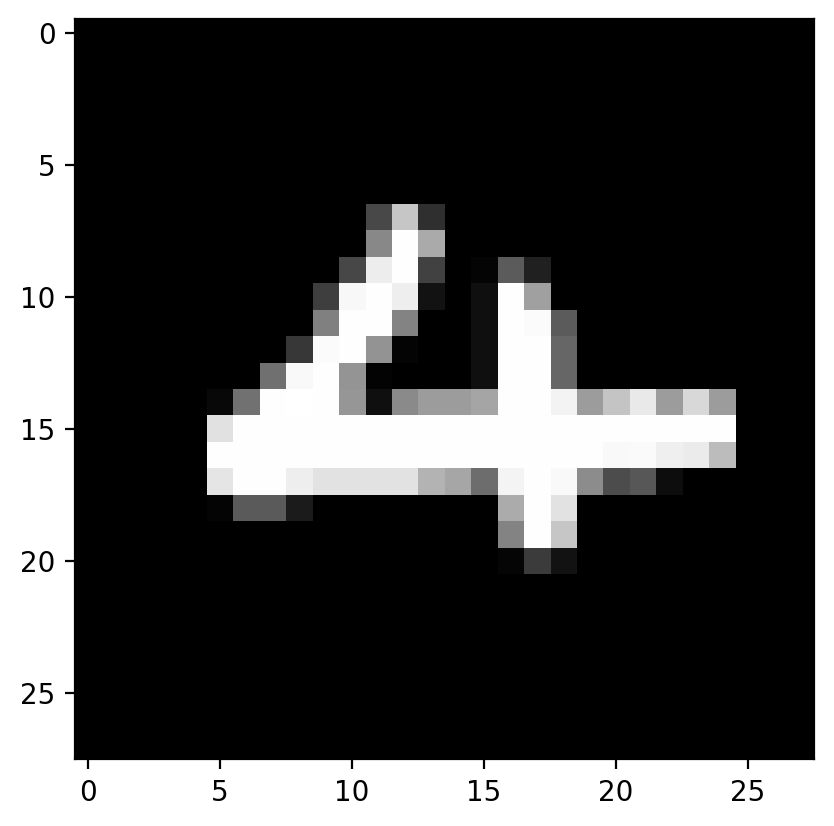

In [29]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

## Building networks with PyTorch

Here I'll use PyTorch to build a simple feedfoward network to classify the MNIST images. That is, the network will receive a digit image as input and predict the digit in the image.

<img src="https://drive.google.com/uc?id=1xQp81KWcl75YKQtnIVWwOLrdPTrn2wGD" width=600px>

To build a neural network with PyTorch, you use the `torch.nn` module. The network itself is a class inheriting from `torch.nn.Module`. You define each of the operations separately, like `nn.Linear(784, 128)` for a fully connected linear layer with 784 inputs and 128 units.

The class needs to include a `forward` method that implements the forward pass through the network. In this method, you pass some input tensor `x` through each of the operations you defined earlier. The `torch.nn` module also has functional equivalents for things like ReLUs in `torch.nn.functional`. This module is usually imported as `F`. Then to use a ReLU activation on some layer (which is just a tensor), you'd do `F.relu(x)`. Below are a few different commonly used activation functions.

<img src="https://drive.google.com/uc?id=1KbSbYz-5ocIOEyM7y2dTsWozMi_XEo8S" width=700px>

So, for this network, I'll build it with three fully connected layers, then a softmax output for predicting classes. The softmax function is similar to the sigmoid in that it squashes inputs between 0 and 1, but it's also normalized so that all the values sum to one like a proper probability distribution.

In [31]:
from torch import nn
from torch import optim
import torch.nn.functional as F

In [32]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        
        return x
    
    def predict(self, x):
        ''' This function for predicts classes by calculating the softmax '''
        logits = self.forward(x)
        return F.softmax(logits)

net = Network()
net

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

### Initializing weights and biases

The weights and such are automatically initialized for you, but it's possible to customize how they are initialized. The weights and biases are tensors attached to the layer you defined, you can get them with `net.fc1.weight` for instance.

In [33]:
print(net.fc1.weight)
print(net.fc1.bias)

Parameter containing:
tensor([[ 0.0011, -0.0281,  0.0300,  ..., -0.0289,  0.0075,  0.0057],
        [-0.0355, -0.0135,  0.0121,  ..., -0.0013,  0.0085,  0.0017],
        [ 0.0271, -0.0159, -0.0349,  ...,  0.0038, -0.0214, -0.0144],
        ...,
        [-0.0192, -0.0269, -0.0068,  ..., -0.0219,  0.0210, -0.0065],
        [-0.0309, -0.0310, -0.0140,  ...,  0.0003,  0.0195, -0.0183],
        [ 0.0315, -0.0059,  0.0289,  ...,  0.0213, -0.0163,  0.0215]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0234,  0.0145, -0.0292, -0.0249,  0.0264, -0.0249,  0.0132,  0.0341,
         0.0300, -0.0118, -0.0259, -0.0224, -0.0066,  0.0339, -0.0091, -0.0238,
         0.0046, -0.0082, -0.0268, -0.0104,  0.0003, -0.0297, -0.0326,  0.0330,
        -0.0024, -0.0131, -0.0270,  0.0254,  0.0245, -0.0262,  0.0101,  0.0234,
        -0.0080, -0.0198, -0.0299, -0.0320, -0.0002, -0.0139, -0.0216, -0.0117,
         0.0096, -0.0102,  0.0334,  0.0320,  0.0055,  0.0194, -0.0291,  0.0340,
        -0.0233

For custom initialization, we want to modify these tensors in place. Once we have the tensors, we can fill them with zeros (for biases) or random normal values.

In [34]:
# Set biases to all zeros
net.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [35]:
# sample from random normal with standard dev = 0.01
net.fc1.weight.data.normal_(std=0.01)

tensor([[-0.0085,  0.0047,  0.0048,  ..., -0.0050, -0.0020, -0.0103],
        [-0.0101,  0.0146,  0.0006,  ...,  0.0036, -0.0019, -0.0049],
        [ 0.0034, -0.0129,  0.0115,  ..., -0.0096, -0.0111, -0.0056],
        ...,
        [ 0.0091, -0.0043, -0.0010,  ...,  0.0005, -0.0101,  0.0063],
        [-0.0010, -0.0095, -0.0035,  ..., -0.0017,  0.0056, -0.0001],
        [ 0.0021, -0.0082, -0.0088,  ..., -0.0102,  0.0025, -0.0027]])

### Forward pass

Now that we have a network, let's see what happens when we pass in an image.

For a better visualization, we define the following function

In [36]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,7), ncols=2)
    ax1.imshow(img.numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10).astype(int), size='large');
    ax2.set_title('Digit Probability')
    ax2.set_xlim(0, 1.1)

torch.Size([64, 1, 28, 28]) torch.Size([64])


/tmp/ipykernel_13624/2455501903.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  ps = F.softmax(logits)


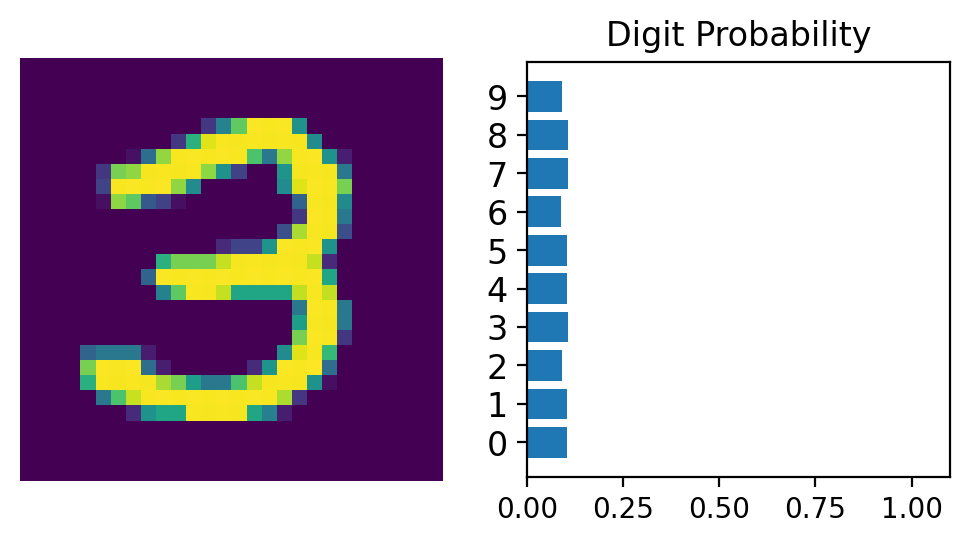

In [38]:
# Grab some data 
dataiter = iter(trainloader)
inputs, labels = next(dataiter)
print(inputs.size(), labels.size())
inputs.resize_(64, 1, 784)

# Forward pass through the network
img_idx = 0
logits = net(inputs[img_idx,:])

# Predict the class from the network output
ps = F.softmax(logits)

img = images[img_idx]
view_classify(img.resize_(1, 28, 28), ps)

In [39]:
inputs.size()

torch.Size([64, 1, 784])

As you can see above, our network has basically no idea what this digit is. It's because we haven't trained it yet, all the weights are random! Next up, we'll look at training this network so it learns how to properly classify these digits.